In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser
import os
from tensorflow import keras,config
from PIL import Image
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:

x_train=np.zeros((680,299,299))
y_train=np.zeros((680))
x_val=np.zeros((120,299,299))
y_val=np.zeros((120))
i=0
for filename in os.listdir("base_dir/train_dir/Normal"):
    image = Image.open(f"base_dir/train_dir/Normal/{filename}")
    image = image.convert('L')
    x_train[i]=np.array(image)
    y_train[i]=0
    i= i+1
for filename in os.listdir("base_dir/train_dir/Tuberculosis"):
    image = Image.open(f"base_dir/train_dir/Tuberculosis/{filename}")
    image = image.convert('L')
    x_train[i]=np.array(image)
    y_train[i] =1
    i=i+1
i=0
for filename in os.listdir("base_dir/val_dir/Normal"):
    image = Image.open(f"base_dir/val_dir/Normal/{filename}")
    image = image.convert('L')
    x_val[i]=np.array(image)
    y_val[i]=0
    i= i+1
for filename in os.listdir("base_dir/val_dir/Tuberculosis"):
    image = Image.open(f"base_dir/val_dir/Tuberculosis/{filename}")
    image = image.convert('L')
    x_val[i]=np.array(image)
    y_val[i] =1
    i=i+1


In [3]:
#Перемешивание тренировочных данных
train_idx = np.random.permutation(x_train.shape[0])
val_idx = np.random.permutation(x_val.shape[0])
x_train, y_train = x_train[train_idx], y_train[train_idx]
x_val, y_val = x_val[val_idx],y_val[val_idx]

In [4]:
x_train = x_train / 255
x_val = x_val / 255
x_train = np.expand_dims(x_train,axis=3)
x_val = np.expand_dims(x_val,axis=3)

In [5]:
CAT = 2
y_val_cat = keras.utils.to_categorical(y_val, CAT)
y_train_cat = keras.utils.to_categorical(y_train, CAT)

/home/cond3nz/.local/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


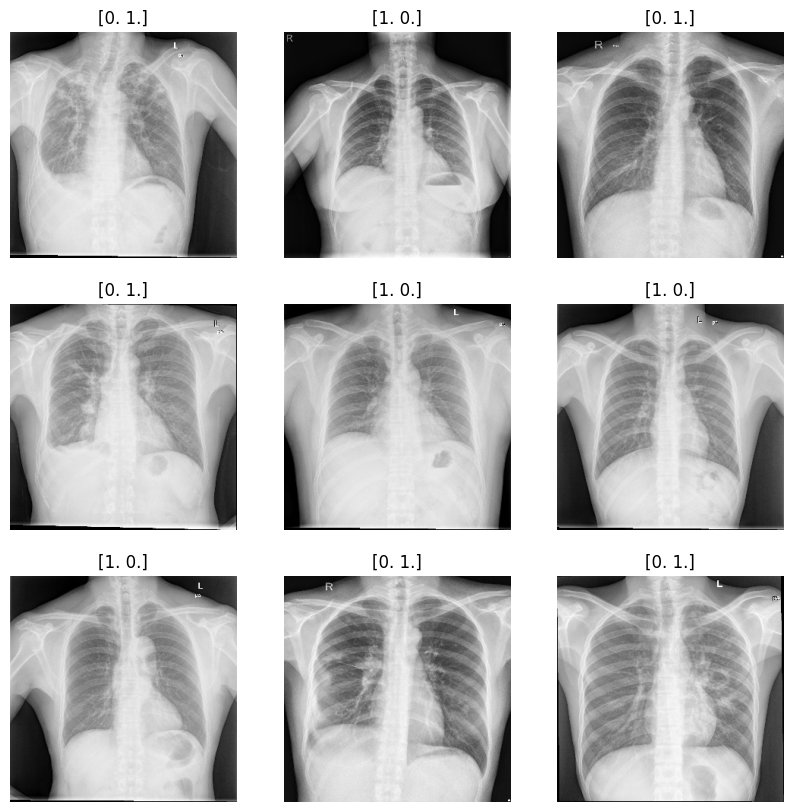

In [20]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train_cat[i])
    plt.axis('off')

In [40]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(299, 299,1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2,  activation='softmax')
])

In [41]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [42]:
batch_size=80
num_epochs=12

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(680, 299, 299, 1)
(680,)
(120, 299, 299, 1)
(120,)


In [44]:
log = model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=num_epochs,validation_data=(x_val, y_val_cat))

Epoch 1/12
9/9 [==============================] - 80s 9s/step - loss: 0.9415 - accuracy: 0.4765 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 2/12
9/9 [==============================] - 79s 9s/step - loss: 0.6934 - accuracy: 0.4779 - val_loss: 0.6924 - val_accuracy: 0.7167
Epoch 3/12
9/9 [==============================] - 79s 9s/step - loss: 0.6892 - accuracy: 0.5838 - val_loss: 0.6909 - val_accuracy: 0.4917
Epoch 4/12
9/9 [==============================] - 79s 9s/step - loss: 0.6877 - accuracy: 0.5456 - val_loss: 0.6595 - val_accuracy: 0.5917
Epoch 5/12
9/9 [==============================] - 79s 9s/step - loss: 0.6213 - accuracy: 0.6824 - val_loss: 0.5422 - val_accuracy: 0.7250
Epoch 6/12
9/9 [==============================] - 79s 9s/step - loss: 0.5528 - accuracy: 0.7544 - val_loss: 0.5055 - val_accuracy: 0.7917
Epoch 7/12
9/9 [==============================] - 79s 9s/step - loss: 0.5000 - accuracy: 0.7809 - val_loss: 0.4715 - val_accuracy: 0.8000
Epoch 8/12
9/9 [==================

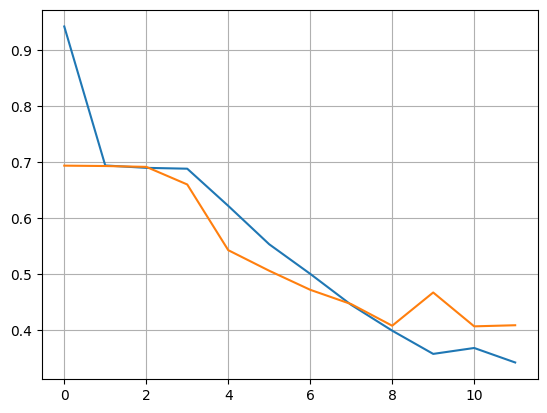

In [45]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])

plt.grid(True)
plt.show()

In [ ]:
model.save("CNN_TubRec")

In [ ]:
loaded_model = keras.models.load_model('CNN_TubRec')

In [12]:
fdialog = FileChooser(
    os.getcwd(),
    filename="tub.png",
    title='<b>Выберите файл</b>',
    show_hidden=False,
    select_default=True,
    show_only_dirs=False
)

display(fdialog)

FileChooser(path='/home/cond3nz/src/NeuroLearn', filename='tub.png', title='<b>Выберите файл</b>', show_hidden…

In [13]:
image= Image.open(fdialog.selected)
image = image.convert("L")
array = np.array(image)/255


1/1 [==============================] - 0s 99ms/step


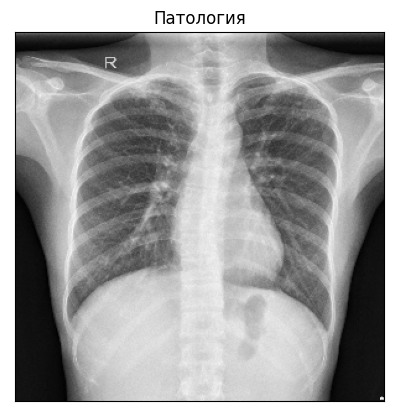

In [16]:
res = loaded_model.predict(np.expand_dims(array,axis=0))
plt.imshow(array,cmap="gray")
plt.xticks([])
plt.yticks([])
if np.argmax(res) == 0:
    plt.title("Норма")
else:
    plt.title("Патология")